# 0. Sinusoids and Spectra
More exercises with sinusoids for fun and profit.
Evan Varan, lze4

## 0.a Imports

In [290]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [291]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


# 1. Set up sinusoids
This is exactly the same as the "Sinusoids" notebook

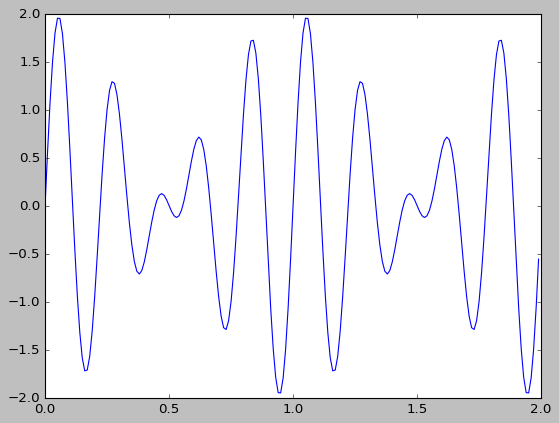

In [292]:
# Frequencies & Length
f1 = 5
f2 = 4
duration = 2.0

# Sampling Rate
Fs = 20 * max(f1,f2)

# Time vector and Sinusoids
t = np.arange(0, duration, 1/Fs)
s1 = np.sin(f1 * 2 * np.pi * t)
s2 = np.sin(f2 * 2 * np.pi * t)

# Add them up
s3 = s1 + s2

plt.plot(t,s3)
plt.show()

## 1.a Plots
Individually and together using subplots

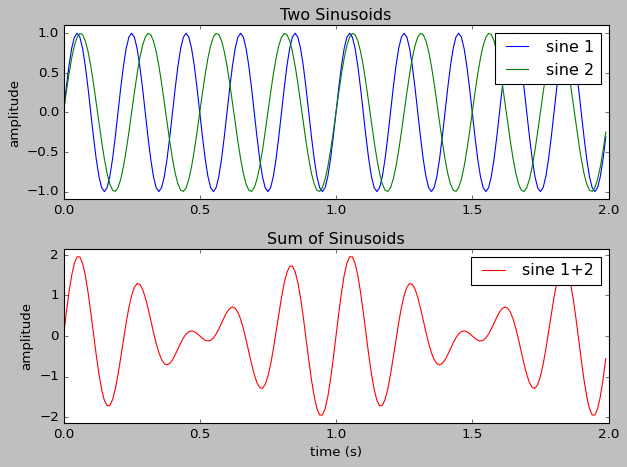

In [293]:
# Individually
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, s1, color='blue', label='sine 1')
plt.plot(t, s2, color='green', label='sine 2')

plt.xlim(0,duration) 
mm = 1.1 * max(s1)
plt.ylim(-mm,mm) 
plt.title('Two Sinusoids')
plt.ylabel('amplitude')
plt.legend()

# Together
plt.subplot(2,1,2)
plt.plot(t, s3, color='red', label='sine 1+2')

plt.xlim(0,duration) 
mm = 1.1 * max(s3)
plt.ylim(-mm,mm) 
plt.title('Sum of Sinusoids')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## 1.b Display should actually should be "stems"
Skipping this since you have it in the previous notebook.

# 2. Spectrum using the FFT
Notes: 
* To get dB, we need to use "_10log10()_"
* To simplify, multiply "_log10_" by 20 instead of actually squaring

## 2.a Compute the Double-Sided Spectrum

In [294]:
# Note that Fs is already defined when we create the sinusoids s1, s2, s3
# Also, I'm using variables here to set up the creation of a utility function later
frame = len(s1)
framepad = 4
NFFT = frame
Ts = 1/Fs
y = s1

##NFFT = 2 ** int(np.ceil(np.log2(np.abs(frame*framepad))))

# FFT of entire time-domain sequence
Y_FFT = fft(y,NFFT) / len(y)

# Double-sided spectrum
Y = np.abs(Y_FFT)

# Frequency values
F = fftfreq(NFFT,Ts)

# Convert to dB
Y = 20.0 * np.log10(Y)

## 2.b Plot the Double-Sided Spectrum

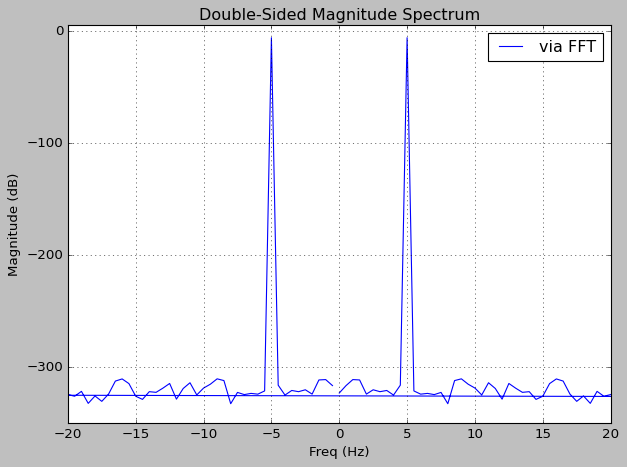

In [295]:
plt.figure()
plt.plot(F, Y, color='blue', label='via FFT', linewidth=1)

plt.title('Double-Sided Magnitude Spectrum')
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')

plt.xlim(-20,20)
plt.ylim(-350,5)
plt.yticks([-300, -200, -100, 0])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## 2.b Check with Built-in Function
Notes:
* The plot library has a built-in "_magnitude_spectrum_" method. 
* It has an implicit"_plt.figure()_" inside it, so it creates a figure itself. 
* Notice the arguments
    * "_sides_" automagically picks double-sided or single-sided spectrum.
    * "_scale_" automagically converts to dB
    * What does "_window_" do?

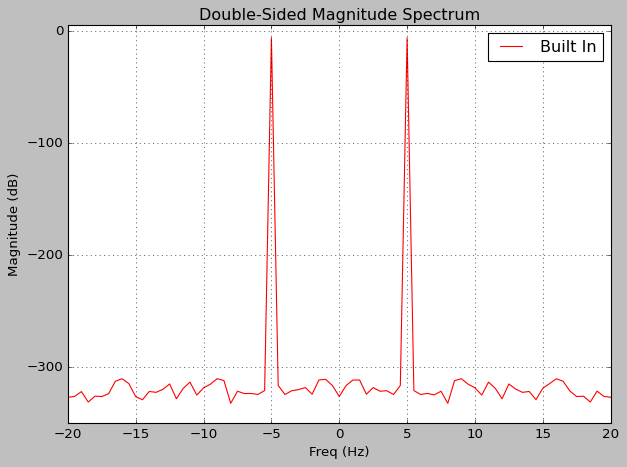

In [296]:
frame = len(s1)
NFFT = frame
Ts = 1/Fs
y = s1


mag, freq, line = plt.magnitude_spectrum(s1,Fs=Fs,
                                            window=np.ones(s1.shape),
                                            pad_to=NFFT,
                                            scale='dB',
                                            sides='twosided',
                                            color='red',
                                            linestyle='-',
                                            label='Built In')

plt.title('Double-Sided Magnitude Spectrum')
plt.xlabel('Freq (Hz)')

plt.xlim(-20,20)
plt.ylim(-350,5)
plt.yticks([-300, -200, -100, 0])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## 2.c Time and Freq in Subplots
* This time, the spectrum plot is single-sided
* Note the indexing into F and Y for the single-sided case

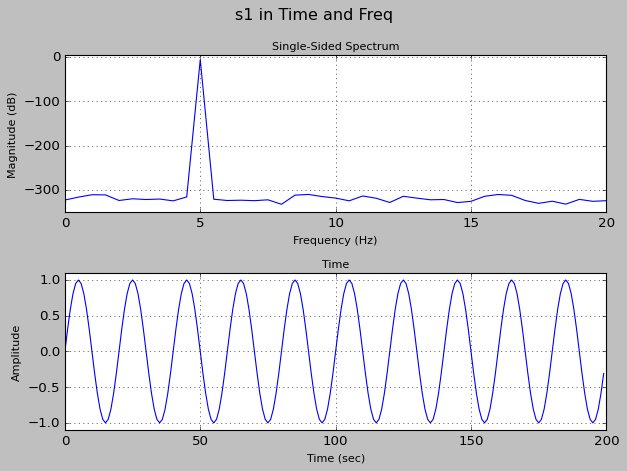

In [297]:
##NFFT = 2 ** int(np.ceil(np.log2(np.abs(frame*framepad))))
fig = plt.figure()
plt.suptitle('s1 in Time and Freq', size='large')
ax1 = fig.add_subplot(2,1,1)
ax1.plot(F[0:NFFT//2], Y[0:NFFT//2], color='blue', label='s1', linewidth=1)

ax1.set_title('Single-Sided Spectrum', fontsize='small')
ax1.set_xlabel('Frequency (Hz)', fontsize='small')
ax1.set_ylabel('Magnitude (dB)', fontsize='small')
ax1.set_xlim([0,20])
ax1.set_ylim([-350,5])
ax1.set_yticks([-300, -200, -100, 0])
ax1.grid()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(y, color='blue', label='s1', linewidth=1)

ax2.set_title('Time', fontsize='small')
ax2.set_xlabel('Time (sec)', fontsize='small')
ax2.set_ylabel('Amplitude', fontsize='small')
ax2.set_ylim([-1.1,1.1])
ax2.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax2.grid()

plt.tight_layout()
plt.show()

# Assignment
1. Plot the "built-in" spectrum and the spectrum computed via FFT for s1, s2, s3 on a single axis (single-sided only)
    * Are they the same? Discuss any differences. 
    * Are the frequencies for s1 and s2 correct?  Label the plots to show this
2. Change the frequencies for s1 and s2, and plot everything again
    * Are the frequencies correct?  Label the plots
3. Change the phase (only) for s2 and plot everything again
    * What happened?
4. What do you think happens to the energy in s1 and s2 when s3 is created?
    * Can you compute the energy in s1, s2, s3?
5. Note the commented value for NFFT in cells 2a and 2c
    * Uncomment this value and make the plots again (change scales so things "look nice")
    * Discuss what happens when NFFT isn't the same as the frame length (e.g. when _"NFFT != len(s1)"_)
6. A good approach to simplify a lot of this stuff is to define your own function to take the FFT of a signal

## 3. Plotting s1,s2,s3 using both built in and computed FFT
The plots show that the built-in functions and computed functions are relatively the same. However, around 15 hertz they start to have very slight differences.

In [298]:
#Helper functions to compute variables needed for fft
def compute_freq(sinusoid,sample):
    freq = fftfreq(len(sinusoid),1/sample)
    return freq
    
def compute_fft(sinusoid):
    z = 20.0 * np.log10(np.abs(fft(sinusoid,len(sinusoid)) / len(sinusoid)))
    return z

def plot_single_sided(sinusoid,sample,name, color1, color2):
    plt.magnitude_spectrum(sinusoid,Fs=sample,window=np.ones(sinusoid.shape),pad_to=len(sinusoid),scale='dB',sides='onesided',color=color1,linestyle='-',label=f'{name} built in')
    plt.plot(compute_freq(sinusoid,sample)[0:len(sinusoid)//2], compute_fft(sinusoid)[0:len(sinusoid)//2], color=color2, label=f'{name} comp', linewidth=1)

def validate_frequency(frequency,color):
    #Validating frequency by drawing a vertical line
    plt.axvline(x=frequency, color=color, linestyle='--')  
    plt.text(frequency + 1, -150, f'frequency =  {frequency}', verticalalignment='center', color = color)



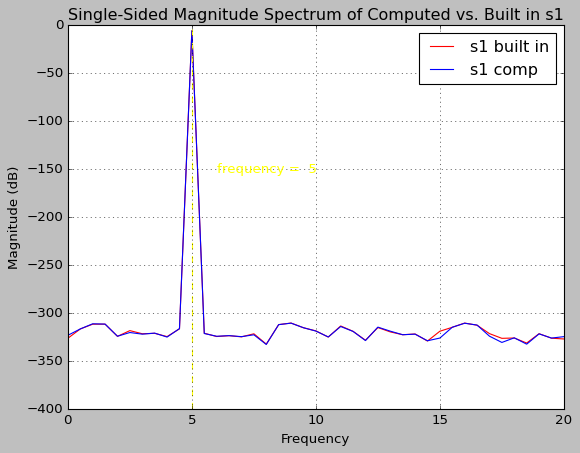

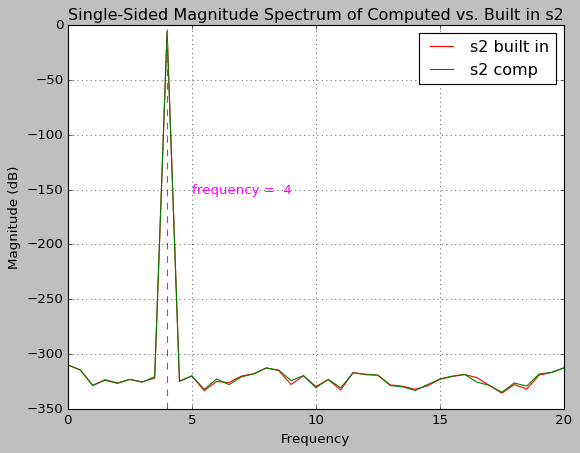

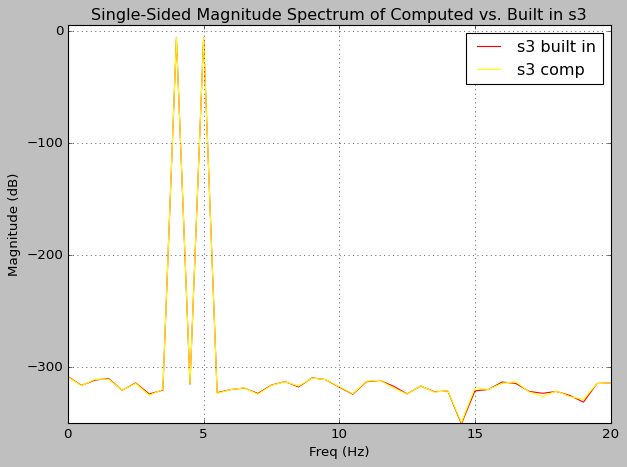

In [299]:
#S1 comp and built in plotting
plot_single_sided(s1,Fs,'s1', 'red', 'blue')
validate_frequency(f1,'yellow')

plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s1')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#S2 comp and built in plotting
plot_single_sided(s2,Fs,'s2', 'red', 'green')
validate_frequency(f2,'magenta')

plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#S3 comp and built in plotting
plot_single_sided(s3,Fs,'s3', 'red', 'yellow')


plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s3')
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')

plt.xlim(0,20)
plt.ylim(-350,5)
plt.yticks([-300, -200, -100, 0])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## 3.a Thoughts
When comparing the computed and built-in functions, the differences are very small. The functions are almost identical, but tend to have small fluctuations starting at 15 hertz.
The frequencies of the plots are correct. We can see this through the dotted vertical lines on the plots used to validate the frequency.

## 4 Changing the frequencies of s1 and s2

<Figure size 640x480 with 0 Axes>

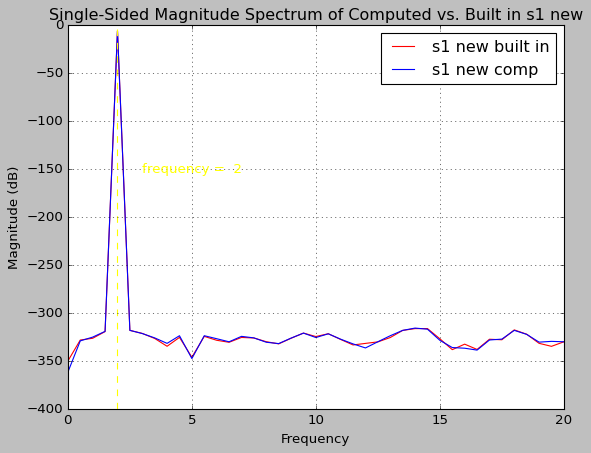

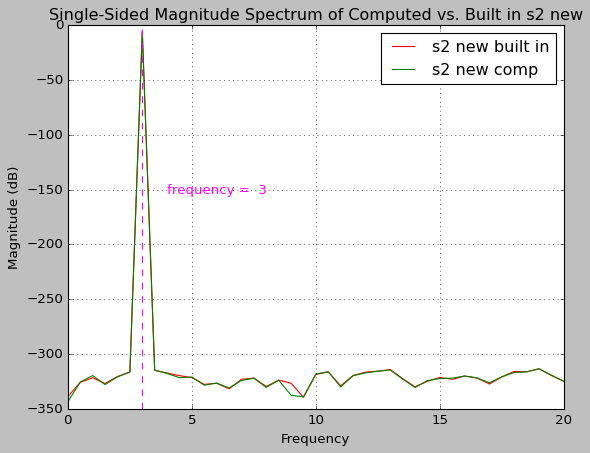

<Figure size 640x480 with 0 Axes>

In [300]:
# New Frequencies
f1_new = 2
f2_new = 3
duration = 2.0

Fs_new = 20 * max(f1_new,f2_new)

t = np.arange(0, duration, 1/Fs_new)
s1_new = np.sin(f1_new * 2 * np.pi * t)
s2_new = np.sin(f2_new * 2 * np.pi * t)

#S1 new comp and built in plotting
plot_single_sided(s1_new,Fs_new,'s1 new', 'red', 'blue')
validate_frequency(f1_new,'yellow')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s1 new')

plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#S2 new comp and built in plotting
plot_single_sided(s2_new,Fs_new,'s2 new', 'red', 'green')
validate_frequency(f2_new,'magenta')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2 new')

plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

## 4.a Thoughts
The frequencies of the plots are correct. We can see this through the dotted vertical lines on the plots used to validate the frequency.

## 5. Changing the phase of s2

<Figure size 640x480 with 0 Axes>

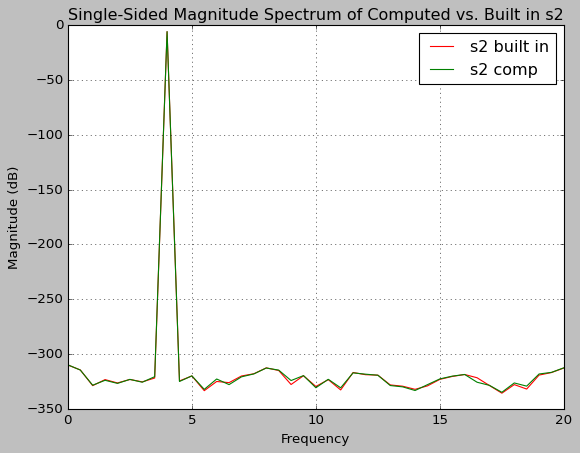

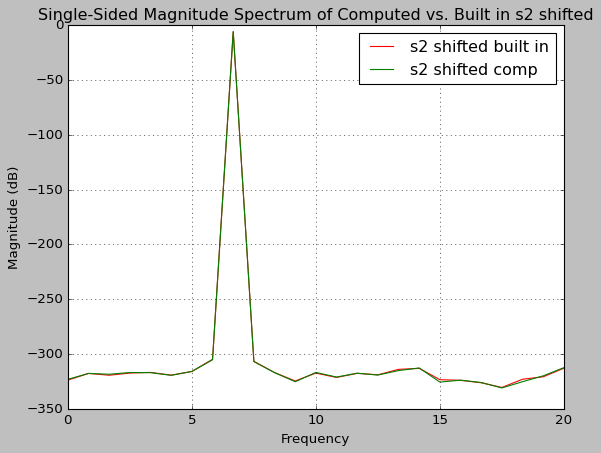

<Figure size 640x480 with 0 Axes>

In [301]:
phase_shift = 3 * np.pi/ 2 #phase shift of π/2
phase_shift_s2 = np.sin(f2 * 2 * np.pi * t + phase_shift)

plot_single_sided(s2,Fs,'s2', 'red', 'green')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#S2 new phase plotting
plot_single_sided(phase_shift_s2,Fs,'s2 shifted', 'red', 'green')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2 shifted')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

## 5.a Thoughts
When we changed the phase the function shifted over slightly. There is also a noticeable horizontal stretch happening when the phase is changed.

## 6. Energy of s1, s2, s3
The energy of sinusoid can be computed by taking the integral of the sinusoid function from zero to a specific time and squaring it. This integral would be done with respect to time
The energy in s1 and s2 will be converted in s3 upon creation.


In [302]:
#Computing energy with time ranging from 0 to 15
dt = t[15] - t[0]

energy_s1 = np.sum(s1**2) * dt
print("Energy of s1: " + str(energy_s1))
energy_s2 = np.sum(s2**2) * dt
print("Energy of s2: " + str(energy_s2))
energy_s3 = np.sum(s3**2) * dt
print("Energy of s3: " + str(energy_s3))

Energy of s1: 25.0
Energy of s2: 24.999999999999996
Energy of s3: 50.000000000000014


## 7. NFFT
Re-showing everything with NFFT

In [303]:
NFFT = 2 ** int(np.ceil(np.log2(np.abs(frame*framepad))))

In [304]:
#Helper functions to compute variables needed for NFFT
def compute_freq_nfft(sample):
    freq = fftfreq(NFFT,1/sample)
    return freq
    
def compute_nfft(sinusoid):
    z = 20.0 * np.log10(np.abs(fft(sinusoid,NFFT) / len(sinusoid)))
    return z

def plot_single_sided_nfft(sinusoid,sample,name, color1, color2):
    plt.magnitude_spectrum(sinusoid,Fs=sample,window=np.ones(sinusoid.shape),pad_to=NFFT,scale='dB',sides='onesided',color=color1,linestyle='-',label=f'{name} built in')
    plt.plot(compute_freq_nfft(sample)[0:NFFT//2], compute_nfft(sinusoid)[0:NFFT//2], color=color2, label=f'{name} comp', linewidth=1)

<Figure size 640x480 with 0 Axes>

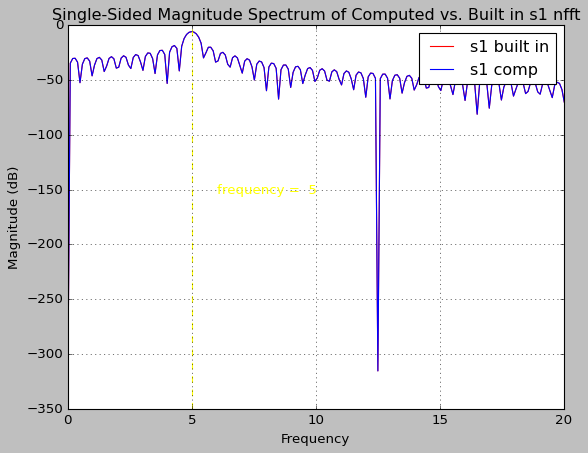

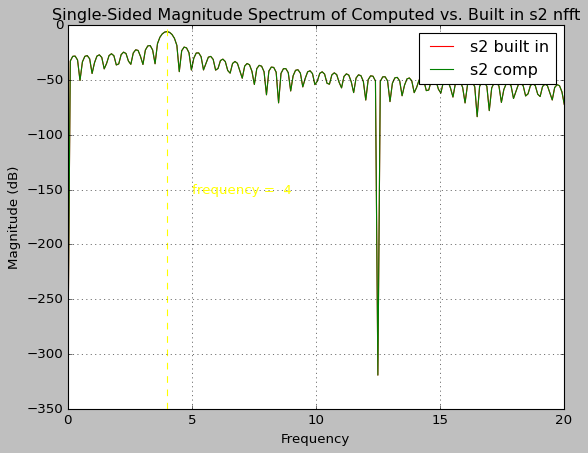

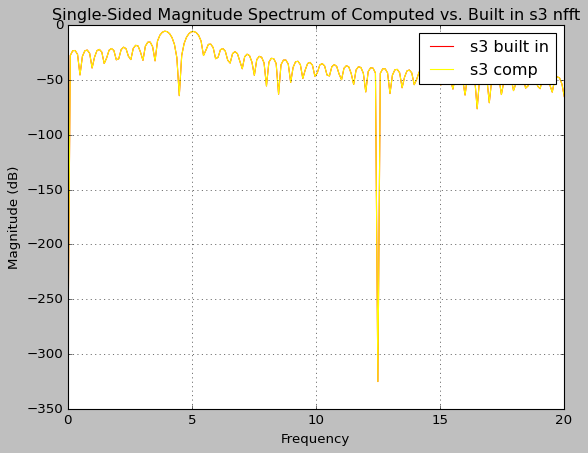

<Figure size 640x480 with 0 Axes>

In [305]:
#S1 new comp and built in plotting for nfft
plot_single_sided_nfft(s1,Fs,'s1', 'red', 'blue')
validate_frequency(f1,'yellow')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s1 nfft')

plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#S2 new comp and built in plotting for nfft
plot_single_sided_nfft(s2,Fs,'s2', 'red', 'green')
validate_frequency(f2,'yellow')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2 nfft')

plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#S3 new comp and built in plotting for nfft
plot_single_sided_nfft(s3,Fs,'s3', 'red', 'yellow')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s3 nfft')

plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()



## 7.a Changing Frequency with NFFT

<Figure size 640x480 with 0 Axes>

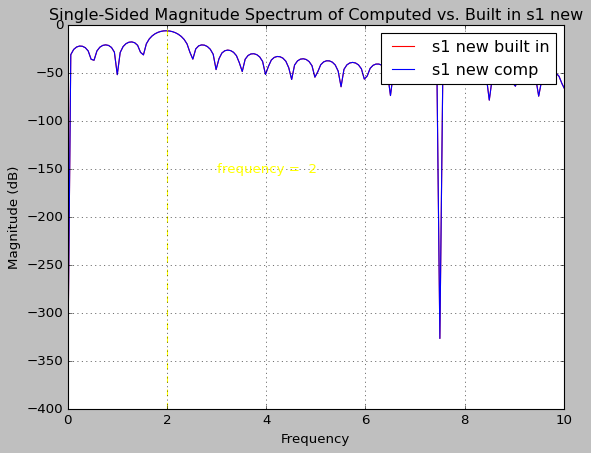

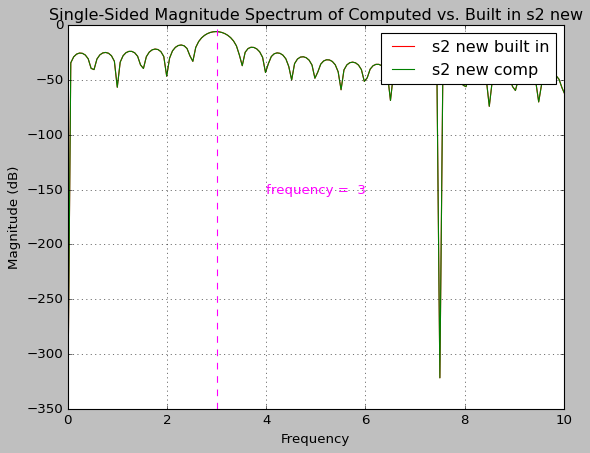

<Figure size 640x480 with 0 Axes>

In [306]:
# New Frequencies
f1_new = 2
f2_new = 3
duration = 2.0

Fs_new = 20 * max(f1_new,f2_new)

t = np.arange(0, duration, 1/Fs_new)
s1_new = np.sin(f1_new * 2 * np.pi * t)
s2_new = np.sin(f2_new * 2 * np.pi * t)

#S1 new comp and built in plotting nfft
plot_single_sided_nfft(s1_new,Fs_new,'s1 new', 'red', 'blue')
validate_frequency(f1_new,'yellow')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s1 new')

plt.xlim(0,10)
plt.grid()
plt.legend()
plt.figure()

#S2 new comp and built in plotting nfft
plot_single_sided_nfft(s2_new,Fs_new,'s2 new', 'red', 'green')
validate_frequency(f2_new,'magenta')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2 new')

plt.xlim(0,10)
plt.grid()
plt.legend()
plt.figure()

## 7.b Changing Phase with NFFT

<Figure size 640x480 with 0 Axes>

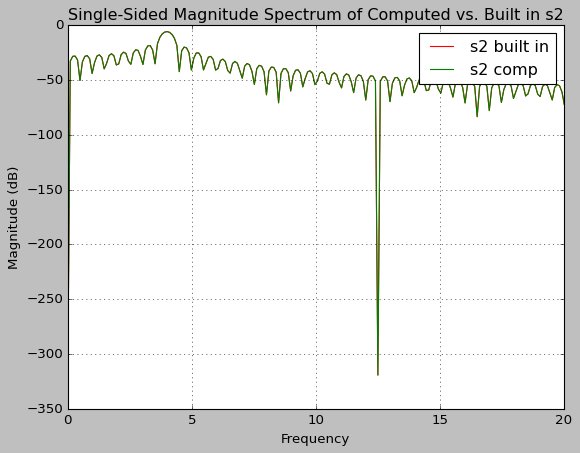

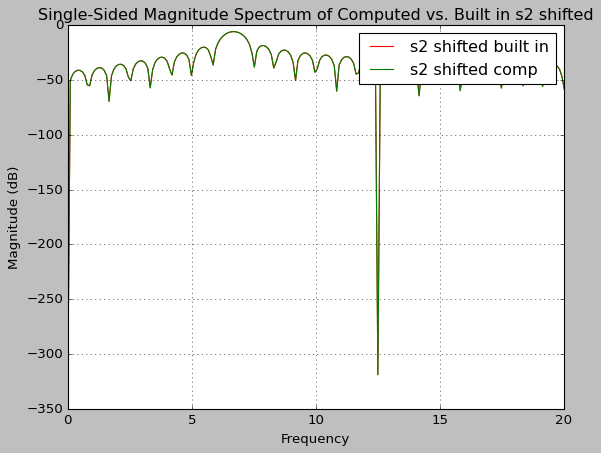

<Figure size 640x480 with 0 Axes>

In [307]:
phase_shift = 3 * np.pi/ 2 #phase shift of π/2
phase_shift_s2 = np.sin(f2 * 2 * np.pi * t + phase_shift)

plot_single_sided_nfft(s2,Fs,'s2', 'red', 'green')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#S2 new phase plotting nfft
plot_single_sided_nfft(phase_shift_s2,Fs,'s2 shifted', 'red', 'green')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s2 shifted')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

When NFFT is not the same as frame length, it seems that the frequency is off on the graph. The graph also becomes more hilly or wavy looking instead of having sharp turns and 
cuts.